<a href="https://colab.research.google.com/github/GeorgeTelles/Extracao_Analise_ETFs.ipynb/blob/main/Extra%C3%A7%C3%A3o_e_An%C3%A1lise_de_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
  <img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_clara.png" alt="logo clara" width="300" style="display: inline-block; vertical-align: top; margin-right: 10px;">
  <img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_dark.png" alt="logo dark" width="300" style="display: inline-block; vertical-align: top;">
</div>

## Visão Geral

Este projeto em Python tem como objetivo extrair e analisar dados relacionados a ETFs (Exchange-Traded Funds) negociados no Brasil. O processo envolve a coleta de informações de ETFs, a obtenção de dados de cotação, e a realização de análises para identificar o desempenho e a liquidez desses fundos.

## Funcionalidades

1. **Coleta de Dados**:
   - **Fonte**: O projeto inicia com a coleta de dados de ETFs a partir do site [Investing.com](https://br.investing.com/etfs/brazil-etfs) usando web scraping.
   - **Processo**: Os nomes, códigos e informações sobre os ETFs são extraídos e processados para análise.

2. **Extração de Cotações**:
   - **Ferramenta**: Utiliza-se a biblioteca `yfinance` para baixar dados históricos de cotação dos ETFs.
   - **Limpeza**: Os dados são filtrados para garantir que apenas ETFs com dados de cotação consistentes sejam analisados. Valores faltantes são tratados e preenchidos.

3. **Análise de Desempenho**:
   - **Normalização**: Os dados são normalizados para facilitar a comparação do desempenho ao longo do tempo.
   - **Top ETFs**: Identificação dos 10 ETFs com o melhor desempenho ao final do período analisado.
   - **Visualização**: Geração de gráficos para ilustrar a performance histórica dos principais ETFs.

4. **Análise de Liquidez**:
   - **Volume de Negociação**: Determinação dos ETFs mais negociados com base no volume médio de transações.
   - **Visualização**: Gráficos que mostram a cotação histórica dos ETFs mais negociados.

## Objetivo

O projeto visa fornecer insights valiosos sobre os ETFs negociados no Brasil, permitindo aos investidores e analistas identificar quais fundos têm apresentado melhor desempenho e quais são os mais negociados no mercado. A análise detalhada e as visualizações resultantes ajudam a tomar decisões informadas sobre investimentos em ETFs.


# **Extração e Análise de ETFs**





# **O que são ETFs?**


Do inglês Exchange-Traded Funds, ou seja, "fundos negociados em bolsa". Eles recebem este nome pois diferentemente dos fundos de investimento, eles são negociados na bolsa, da mesma forma que ações.

Os fundos de índice, ou ETFs (Exchange Traded Funds), são fundos de investimento constituídos com o objetivo de investir em uma carteira de ações que busca replicar a carteira e a rentabilidade de um determinado índice de referência (índice subjacente), como o ibovespa, ou qualquer índice de ações ou de renda fixa reconhecido pela CVM.


Assim, ao adquirir cotas de um ETF referenciado em um índice de ações ou índice de renda fixa, o investidor passa a deter indiretamente todas as ações ou títulos da carteira deste índice, e na mesma proporção que cada uma delas representa do índice, sem precisar comprar separadamente os papéis de cada empresa ou os títulos.

Quando a carteira do índice subjacente é rebalanceada, em função das recomposições periódicas, o administrador do ETF ajustará a composição da carteira do fundo, para refletir a nova composição.

Além disso, o administrador também ajusta a composição da carteira do ETF de maneira a refletir ajustes feitos na composição da carteira teórica do índice devido à distribuição de proventos.

<center><img src = "https://www.investopedia.com/thmb/Lr9gYbzZFRA3pRNIRzG8Ita97ko=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/EFT_final-45a9ca8cf7e948608a3b8dae38b66393.png?raw=true" width = "500">

Fonte: https://www.investopedia.com/terms/e/etf.asp

**Pontos importantes**

* Possibilitam gestão passiva

* ETFs são cestas de títulos negociados em bolsa exatamente como uma ação.

* Os preços das ações do ETF flutuam durante todo o dia à medida que o ETF é comprado e vendido; isso é diferente dos fundos de investimento, que são negociados apenas uma vez por dia após o fechamento do mercado.

* Os ETFs podem conter todos os tipos de investimentos, incluindo ações, commodities ou títulos; alguns oferecem participações apenas nos EUA, enquanto outros são internacionais.

* Os ETFs oferecem baixos índices de despesas e menos comissões de corretores do que comprar ações individualmente.

## Vantagens e desvantages



<center><img src = "https://fernandonogueiracosta.files.wordpress.com/2012/11/etfs.png?raw=true" width = "700">


Fonte: https://fernandonogueiracosta.wordpress.com/2012/11/23/etfs-fundos-de-indices-da-bolsa/

## História dos ETFs

<center><img src = "https://www.visualcapitalist.com/wp-content/uploads/2020/01/history-of-etfs-share.jpg?raw=true" width = "1000">


## Exemplos de ETFs

### ETFs imobiliários

<center><img src = "https://i0.wp.com/deepvalueetfaccumulator.com/wp-content/uploads/2019/09/vnq-usrt-may-4-2007-sep-13-2019.png?ssl=1?raw=true" width = "1000">

### ETFs de Renda Fixa

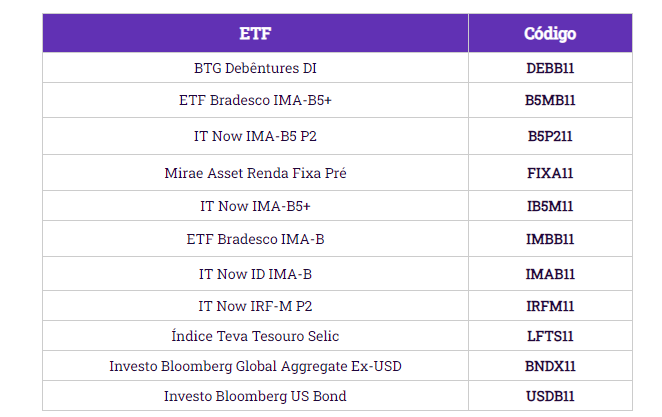

Fonte: https://blog.toroinvestimentos.com.br/bolsa/etf-renda-fixa

ETFs de renda fixa dos EUA

Fonte: https://www.infomoney.com.br/onde-investir/9-etfs-para-comecar-a-investir-em-renda-fixa-em-dolar-nos-eua/

## ETFs negociados no Brasil

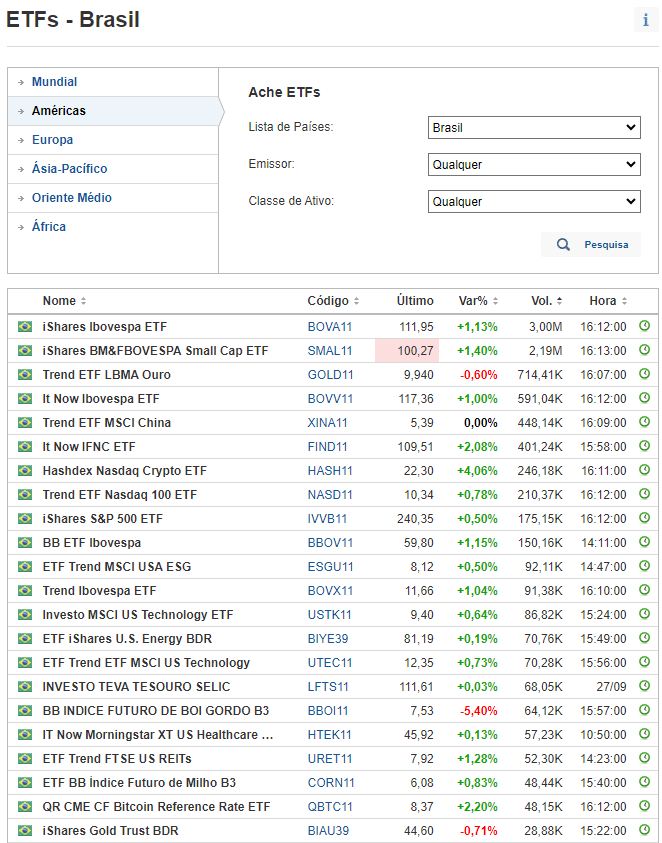

https://br.investing.com/etfs/brazil-etfs

# **Código**

## 0. Importação das bibliotecas

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import yfinance as yf
import requests

## 1. Captura dos nomes, códigos e dados dos ETFs

In [ ]:
url = 'https://br.investing.com/etfs/brazil-etfs'
etf_url = requests.get(url)
etf_url

In [ ]:
etf_bs4 = BeautifulSoup(etf_url.text, 'html.parser')
etf_table = etf_bs4.findAll(attrs = {'id': 'etfs'})
table_etf = pd.read_html(str(etf_table[0]))
etfs = table_etf[0]
etfs

## 2. Extração e processamento dos dados de cotação dos ETFs

In [ ]:
etfs = etfs.iloc[:,1:7] #Limpando DF
list(etfs['Código']) #Listando os Códigos dos ETFs
[i + '.SA' for i in list(etfs['Código'])] #Adicionando .SA nos codigos
pass

**Baixando os dados**

In [ ]:
etfs = yf.download([i + '.SA' for i in list(etfs['Código'])], start = '2023-01-01')['Close']

**Conferindo os dados**

In [ ]:
etfs.head()

**Tratando os dados missings**

Pegando os ETFs que tem pelo menos 90% dos dados de cotação

Quaisquer ETFs que tenham menos dados que isso nem serão considerados.

Você pode ajustar esse filtro de acordo com a sua preferência.

In [ ]:
etfs_filtrados = etfs[etfs.columns[etfs.isna().sum()/etfs.shape[0] < 0.9]]
etfs_filtrados

**Preenchendo os missings restantes**

In [ ]:
etfs_filtrados = etfs_filtrados.ffill(axis = 0)
etfs_filtrados

## 3. Análises de desempenho

#### **Normalizando os dados e obtendo os 10 ETFs que melhor performaram**

In [ ]:
# Normalizar os valores para começar com zero e converter para porcentagem
etfs_norm = (etfs_filtrados / etfs_filtrados.iloc[0] - 1) * 100

# Obter os 10 ETFs com maior valor percentual no final do período
top_10_etfs = etfs_norm.iloc[-1].sort_values(ascending=False).head(10)

top_10_etfs

**Dados de cotações dos 10 melhores ETFs**

In [ ]:
nomes_etfs = list(etfs_norm.iloc[-1].sort_values(ascending = False).head(10).index)
etfs_norm[nomes_etfs]

#4. Visualização da cotação historica dos Top 10 mais lucrativos

In [ ]:
etfs_norm[nomes_etfs].plot(figsize = (16,8));

#5. Quais são os ETFs mais negociados no Brasil, na média?

In [ ]:
etfs_norm.columns
volumes = yf.download(list(etfs_norm.columns), start = '2023-01-01')['Volume']
volumes.mean().sort_values(ascending = False).head(10)

**Dados de cotações dos 10 ETFs mais negociados**

In [ ]:
mais_negociados = volumes[volumes.mean().sort_values(ascending = False).head(10).index]
etfs_norm[volumes.mean().sort_values(ascending = False).head(10).index]

#6. Visualização da cotação historica dos Top 10 mais negociados

In [ ]:
etfs_norm[volumes.mean().sort_values(ascending = False).head(10).index].plot()